Uncomment lines from this notebook to learn more.

In [1]:
# 1.1 Import tensorflow and other libraries.
import tensorflow as tf
import numpy as np

%matplotlib inline
import pylab

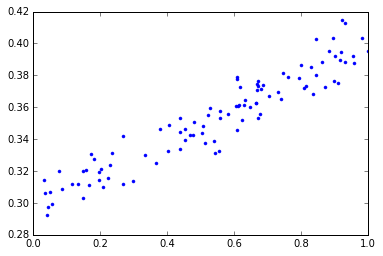

In [2]:
# 1.2 Create input data using NumPy. y = x * 0.1 + 0.3 + noise
x_train = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_train))
y_train = x_train * 0.1 + 0.3 + noise

# Uncomment the following line to plot our input data.
pylab.plot(x_train, y_train, '.')

In [3]:
# Create some fake evaluation data
x_eval = np.random.rand(len(x_train)).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_train))
y_eval = x_eval * 0.1 + 0.3 + noise

In [4]:
# 1.3 Buld inference graph.
# Create Variables W and b that compute y_data = W * x_data + b
W = tf.get_variable(shape=[], name='weights')
b = tf.get_variable(shape=[], name='bias')

# Uncomment the following lines to see W and b are.
print(W)
print(b)

# Create a placeholder we'll use later to feed x's into the graph for training and eval.
# shape=[None] means we can put in any number of examples. 
# This is used for minibatch training, and to evaluate a lot of examples at once.
x = tf.placeholder(shape=[None], dtype=tf.float32, name='x')

# Uncomment this line to see what x is
print(x)

# This is the same as tf.add(tf.mul(W, x), b), but looks nicer
y = W * x + b

Tensor("x:0", shape=(?,), dtype=float32)


In [5]:
# Write the graph so we can look at it in TensorBoard
# Now is a good time to try that
sw = tf.train.SummaryWriter('.', graph=tf.get_default_graph())

In [6]:
# Create a placeholder we'll use later to feed the correct y value into the graph
y_label = tf.placeholder(shape=[None], dtype=tf.float32, name='y_label')
# print (y_label)

In [7]:
# 1.4 Build training graph.
loss = tf.reduce_mean(tf.square(y - y_label))  # Create an operation that calculates loss.
optimizer = tf.train.GradientDescentOptimizer(0.5)  # Create an optimizer.
train = optimizer.minimize(loss)  # Create an operation that minimizes loss.

# Uncomment the following 3 lines to see what 'loss', 'optimizer' and 'train' are.
# print("loss:", loss)
# print("optimizer:", optimizer)
# print("train:", train)

In [8]:
# Create an operation to initialize all the variables.
init = tf.initialize_all_variables()
# print(init)

In [9]:
# 1.6 Create a session and launch the graph.
sess = tf.Session()
sess.run(init)

# Uncomment the following line to see the initial W and b values.
print(sess.run([W, b]))

[0.87555921, 0.98269165]


In [10]:
# Uncomment these lines to test that we can compute a y from an x (without having trained anything). 
# x must be a vector, hence [3] not just 3.
x_in = [3]
sess.run(y, feed_dict={x: x_in})

array([ 3.60936928], dtype=float32)

In [11]:
# Calculate accuracy on the evaluation data before training
def eval():
    return sess.run(loss, feed_dict={x: x_eval, y_label: y_eval})
eval()

1.2427779

In [12]:
# Add a summary so we can visualize the loss in TensorBoard
tf.scalar_summary('loss', loss)
summary_op = tf.merge_all_summaries()

In [13]:
# 1.7 Perform training.
for step in range(201):
    # Run the training op; feed the training data into the graph
    summary_str, _ = sess.run([summary_op, train], feed_dict={x: x_train, y_label: y_train})
    sw.add_summary(summary_str, step)
    # Uncomment the following two lines to watch training happen real time.
    if step % 20 == 0:
        print(step, sess.run([W, b]))

0 [0.22192824, -0.11912024]
20 [0.18160404, 0.25233516]
40 [0.12476533, 0.28489351]
60 [0.10781289, 0.29460421]
80 [0.10275675, 0.29750049]
100 [0.10124875, 0.29836428]
120 [0.10079895, 0.29862195]
140 [0.10066478, 0.29869881]
160 [0.10062477, 0.29872173]
180 [0.10061287, 0.29872856]
200 [0.10060931, 0.29873058]


(0, 1.0)

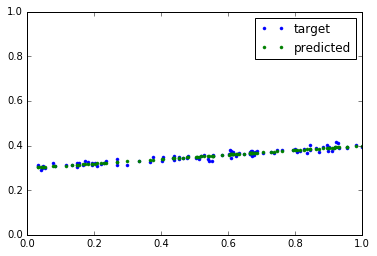

In [14]:
# 1.8 Uncomment the following lines to plot the predicted values
pylab.plot(x_train, y_train, '.', label="target")
pylab.plot(x_train, sess.run(y, feed_dict={x: x_train, y_label: y_train}), ".", label="predicted")
pylab.legend()
pylab.ylim(0, 1.0)

In [15]:
# Check accuracy on eval data after training
eval()

9.0223701e-05

Demonstrate saving and restoring a model

In [16]:
def predict(x_in): return sess.run(y, feed_dict={x: [x_in]})

In [17]:
# Save the model
saver = tf.train.Saver()
saver.save(sess, 'my_checkpoint.ckpt')

'my_checkpoint.ckpt'

In [18]:
# Current prediction
predict(3)

array([ 0.60055852], dtype=float32)

In [19]:
# Reset the model by running the init op again
sess.run(init) 

In [20]:
# Prediction after variables reinitialized
predict(3)

array([-2.45232272], dtype=float32)

In [21]:
saver.restore(sess, 'my_checkpoint.ckpt')

In [22]:
# Predictions after variables restored
predict(3)

array([ 0.60055852], dtype=float32)